## Install packages

In [ ]:
!pip install geopandas
!pip install geemap
!pip install heatmapz
!pip install eeconvert

     |████████████████████████████████| 994 kB 19.8 MB/s 
     |████████████████████████████████| 6.6 MB 48.5 MB/s 
     |████████████████████████████████| 1.0 MB 27.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 464 kB 12.5 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 219 kB 32.6 MB/s 
     |████████████████████████████████| 1.6 MB 14.6 MB/s 
     |████████████████████████████████| 1.3 MB 40.0 MB/s 
     |████████████████████████████████| 98 kB 5.7 MB/s 
     |████████████████████████████████| 133 kB 35.9 MB/s 
     |████████████████████████████████| 3.3 MB 26.8 MB/s 
     |████████████████████████████████| 1.2 MB 40.4 MB/s 
     |████████████████████████████████| 76 kB 7.7 MB/s 
     |████████████████████████████████| 229 kB 35.3 MB/s 
     |████████████████████████████████| 104 kB 35.9 MB/s 
     |██████████████████████████████

## Import packages

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import geemap
# geemap.update_package()
import ee
import eeconvert
ee.Authenticate()
ee.Initialize()

from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
from heatmap import heatmap, corrplot # Import the two methods from heatmap library

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

## Convert Feature collection with extracted data to pandas dataframe

In [ ]:
def largefc_to_pandas(featurecollection, step_size = 5000):
    """
    function to convert a featurecollection with more than 5000 elements to a pandas dataframe
    
    featurecollection: earth engine feature collection with more than 5000 elements
    step_size: Th enumber of elemenst to process at once. Must be less than equal to 5000
    
    """
    df = pd.DataFrame()
    fclist = featurecollection.toList(featurecollection.size())
    fcsize = featurecollection.size().getInfo()
    for i in range(0,fcsize,step_size):
        fc = ee.FeatureCollection(fclist.slice(i,i+step_size))
        df = df.append(geemap.ee_to_pandas(fc))
    return df

In [ ]:
fc = ee.FeatureCollection('users/jdmwhite/buff_sampled_points')
df  = largefc_to_pandas(fc)
print(f"There are {len(df)} features")
print(df.info(memory_usage='deep'))
print(df.head(5))

There are 10491 features
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10491 entries, 0 to 490
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CHILI                          10491 non-null  int64  
 1   H_N_tot                        10491 non-null  int64  
 2   H_bed_depth                    10491 non-null  int64  
 3   H_bulk_dens                    10491 non-null  int64  
 4   H_carb_org                     10491 non-null  int64  
 5   H_carb_tot                     10491 non-null  int64  
 6   H_cec                          10491 non-null  int64  
 7   H_clay                         10491 non-null  int64  
 8   H_fcc                          10491 non-null  int64  
 9   H_ph                           10491 non-null  int64  
 10  H_sand                         10491 non-null  int64  
 11  H_silt                         10491 non-null  int64  
 12  H_stone                

## Step 1: Remove redundant variables
## Step 2: Remove low predictive variables using shaprfecv

In [ ]:
# pts = ee.FeatureCollection('users/jdmwhite/buff_sampled_points')
# print(pts_list.size().getInfo())
# pts_list = pts.toList(10491)
# # print(pts_list.size().getInfo())
# pts_0_5000 = pts_list.slice(0,5000)
# pts_5001_10000 = pts_list.slice(5000,10000)
# pts_10001_10491 = pts_list.slice(10000,10491)
# # print(pts_1_5000.size().getInfo())

# fc_0_5000 = ee.FeatureCollection(pts_0_5000)
# fc_5001_10000 = ee.FeatureCollection(pts_5001_10000)
# fc_10001_10491 = ee.FeatureCollection(pts_10001_10491)
# # print(fc_1_5000.size().getInfo())
# # print(pts_list)
# pd_0_5000 = geemap.ee_to_pandas(fc_0_5000)
# pd_5001_10000 = geemap.ee_to_pandas(fc_5001_10000)
# pd_10001_10491 = geemap.ee_to_pandas(fc_10001_10491)
# # print(pd_0_5000)
# # print(pd_5001_10000)

# data = pd_0_5000.append(pd_5001_10000).append(pd_10001_10491)
# print(data)

10491
     CHILI  H_N_tot  H_bed_depth  H_bulk_dens  H_carb_org  H_carb_tot  H_cec  \
0      231       62          200          141          21          32     26   
1      231       58          200          144          21          32     27   
2      228       63          200          140          21          34     28   
3      229       59          200          142          22          33     27   
4      230       60          200          141          21          32     28   
..     ...      ...          ...          ...         ...         ...    ...   
486    225       54          200          142          21          31     25   
487    225       55          200          142          21          31     26   
488    231       55          200          141          22          31     26   
489    234       57          200          141          22          33     26   
490    234       55          200          142          21          31     25   

     H_clay  H_fcc  H_ph  ...   w

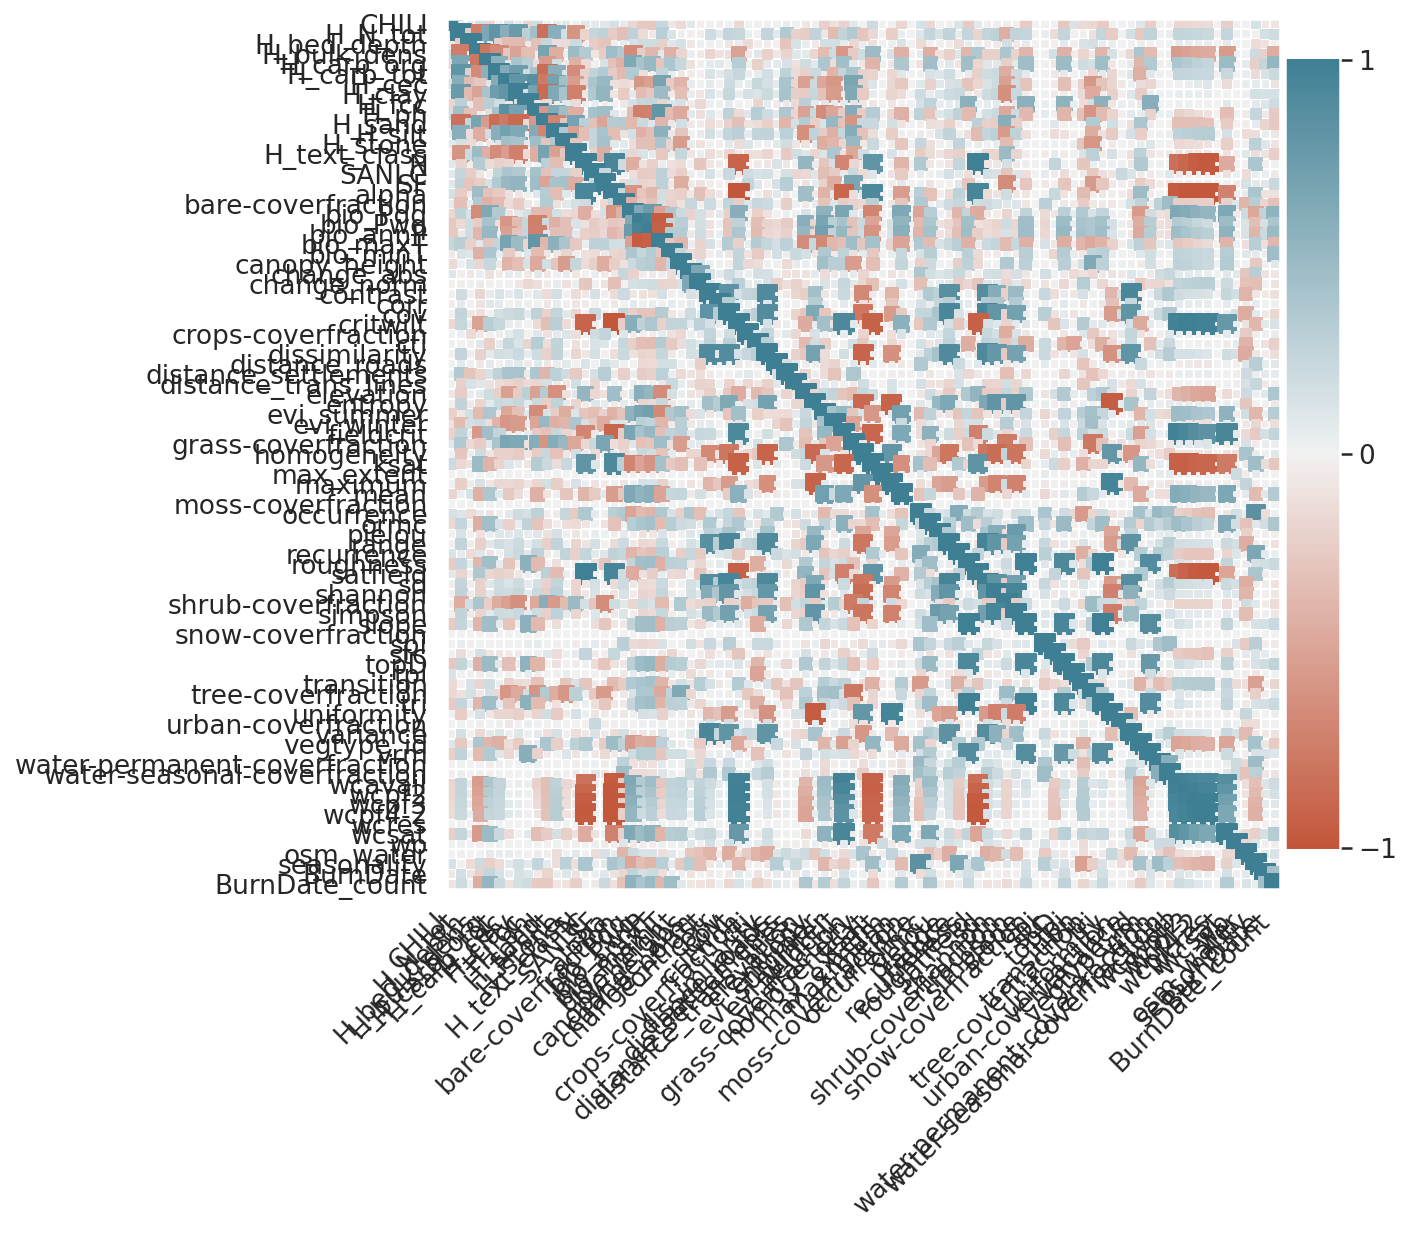

In [ ]:
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=100);

In [ ]:
corr_mat = data.corr()
corr_mat

,CHILI,H_N_tot,H_bed_depth,H_bulk_dens,H_carb_org,H_carb_tot,H_cec,H_clay,H_fcc,H_ph,...,wcpf2,wcpf3,wcpf4-2,wcres,wcsat,wp,osm_water,seasonality,BurnDate,BurnDate_count
CHILI,1.000000,-0.038944,-0.057186,0.160101,-0.160244,-0.004486,0.149906,0.069673,-0.170107,0.188661,...,-0.166682,-0.146174,-0.131991,NaN,-0.209260,0.026847,0.003055,0.138242,-0.065258,-0.083333
H_N_tot,-0.038944,1.000000,-0.235436,-0.748929,0.661955,0.815417,0.596073,0.757081,0.296782,0.440341,...,0.248533,0.231970,0.218863,NaN,0.247941,0.031753,-0.023036,-0.011335,0.170227,0.198753
H_bed_depth,-0.057186,-0.235436,1.000000,0.040453,-0.032013,-0.210982,-0.337453,-0.352069,-0.057803,-0.305526,...,0.056088,0.049615,0.045022,NaN,0.078726,-0.000091,0.007700,-0.144726,-0.084696,0.006439
H_bulk_dens,0.160101,-0.748929,0.040453,1.000000,-0.791730,-0.650056,-0.265807,-0.505459,-0.328725,-0.034846,...,-0.517561,-0.478947,-0.449288,NaN,-0.558414,-0.025529,-0.003396,0.204602,-0.201195,-0.438708
H_carb_org,-0.160244,0.661955,-0.032013,-0.791730,1.000000,0.573490,0.101665,0.406007,0.309886,-0.127175,...,0.347484,0.291405,0.252926,NaN,0.483393,0.007270,0.068165,-0.212314,0.249898,0.528114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wp,0.026847,0.031753,-0.000091,-0.025529,0.007270,0.012615,-0.011203,0.007137,0.010190,0.008674,...,0.050217,0.037840,0.029216,NaN,0.086280,1.000000,-0.158730,0.112577,-0.023118,-0.031857
osm_water,0.003055,-0.023036,0.007700,-0.003396,0.068165,0.055916,0.056450,-0.020602,-0.006067,-0.049134,...,-0.103225,-0.077846,-0.058384,NaN,-0.159793,-0.158730,1.000000,0.004934,0.087773,0.125962
seasonality,0.138242,-0.011335,-0.144726,0.204602,-0.212314,-0.130334,0.079088,0.173461,0.081861,0.254560,...,-0.352631,-0.391221,-0.407757,NaN,-0.201139,0.112577,0.004934,1.000000,-0.006819,0.050579
BurnDate,-0.065258,0.170227,-0.084696,-0.201195,0.249898,0.137810,0.056908,0.149687,0.106009,-0.049942,...,0.093869,0.064657,0.045470,NaN,0.159063,-0.023118,0.087773,-0.006819,1.000000,0.441677


alt.Chart(...)

### Export csv (note sure where to send this?)

In [ ]:
!pip install google.colab
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 72 kB 1.9 MB/s 
     |████████████████████████████████| 64 kB 4.3 MB/s 
     |████████████████████████████████| 104 kB 55.0 MB/s 
     |████████████████████████████████| 758 kB 56.6 MB/s 
     |████████████████████████████████| 8.0 MB 34.0 MB/s 
     |████████████████████████████████| 10.1 MB 44.9 MB/s 
     |████████████████████████████████| 57 kB 10.5 MB/s 
     |████████████████████████████████| 484 kB 54.4 MB/s 
     |████████████████████████████████| 245 kB 65.4 MB/s 
     |████████████████████████████████| 58 kB 12.5 MB/s 
     |████████████████████████████████| 118 kB 67.9 MB/s 
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102290 sha256=36b9b3d09a498a5932de11e2f8869275270f8ab76c6def29b1b41bf6b94d31a6
  Stored in directory: /root/.cache/pip/wheels/f6/3b/58/f34ea9045a7c69bd5634978bf25ac60277e90997d9e6e74192
  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13386 sha256=

KeyError: 'CLOUDSDK_CONFIG'

In [ ]:
corr_mat.to_csv("corr_mat.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/corr_mat.csv'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35d01260-f96c-43fd-ad32-af4e4f71b35c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>